In [ ]:
#例2-1 用Python直接计算两点间的欧式距离
# -*- coding: utf-8 -*-
from numpy import*
v1 = mat([1,2])
v2 = mat([3,4])
print(sqrt((v1-v2)*(v1-v2).T))
[[2.82842712]]

In [ ]:
#例2-2 通过pdist()函数计算两点间的欧式距离
# -*- coding: utf-8 -*-
from numpy import*
from scipy.spatial.distance import pdist
v1 = mat([1,2])
v2 = mat([3,4])
x = vstack([v1,v2])
d = pdist(x)
print(d)
[2.82842712]

In [ ]:
#例2-3 计算两点间的曼哈顿距离
from numpy import*
m = mat([1,2,3])
n = mat([4,5,6])
print(sum(abs(m-n)))


In [ ]:
#例2-4 通过pdist()函数计算两点间的曼哈顿距离'cityblock'
from numpy import*
from scipy.spatial.distance import pdist
m = mat([1,2,3])
n = mat([4,5,6])
X = vstack([m,n])
print(pdist(X,'cityblock'))


In [ ]:
#例2-5 计算两点间的切比雪夫距离
from numpy import*
from numpy import*
a = mat([1,2,3])
b = mat([4,5,6])
print(abs(a-b).max())


In [ ]:
# 例2-6 通过pdist()函数计算两点间的切比雪夫距离chebyshev
from numpy import*
from scipy.spatial.distance import pdist
a = mat([1,2,3])
b = mat([4,5,6])
X = vstack([a,b])
print(pdist(X,'chebyshev'))

In [2]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

plt.style.use('ggplot')
# plt.figure(figsize=(2,3),dpi=720)

#案例一，电影分类
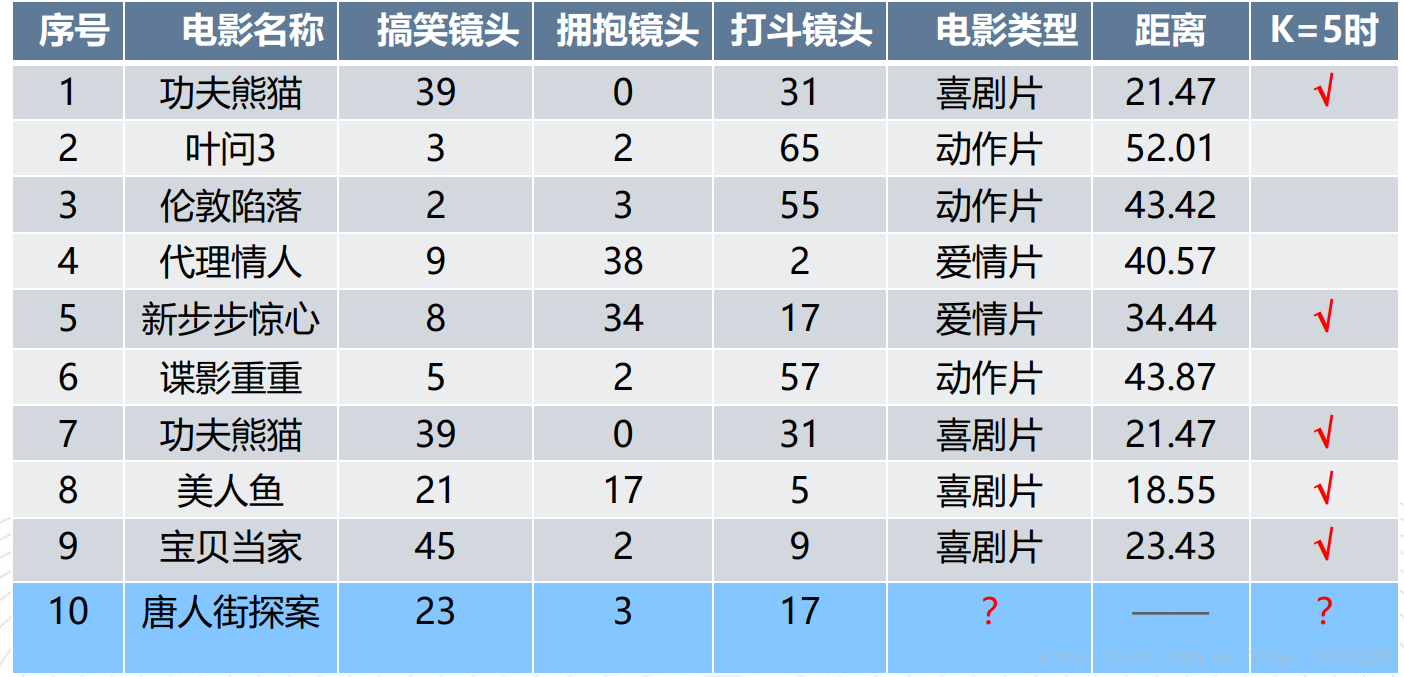

In [47]:
import math

movie_data = {"宝贝当家": [45, 2, 9, "喜剧片"],
              "美人鱼": [21, 17, 5, "喜剧片"],
              "澳门风云3": [54, 9, 11, "喜剧片"],
              "功夫熊猫3": [39, 0, 31, "喜剧片"],
              "谍影重重": [5, 2, 57, "动作片"],
              "叶问3": [3, 2, 65, "动作片"],
              "伦敦陷落": [2, 3, 55, "动作片"],
              "我的特工爷爷": [6, 4, 21, "动作片"],
              "奔爱": [7, 46, 4, "爱情片"],
              "夜孔雀": [9, 39, 8, "爱情片"],
              "代理情人": [9, 38, 2, "爱情片"],
              "新步步惊心": [8, 34, 17, "爱情片"]}

# 测试样本  唐人街探案": [23, 3, 17, "？片"]
x = [23, 3, 17]



[['宝贝当家', 23.43], ['美人鱼', 18.55], ['澳门风云3', 32.14], ['功夫熊猫3', 21.47], ['谍影重重', 43.87], ['叶问3', 52.01], ['伦敦陷落', 43.42], ['我的特工爷爷', 17.49], ['奔爱', 47.69], ['夜孔雀', 39.66], ['代理情人', 40.57], ['新步步惊心', 34.44]]
[['我的特工爷爷', 17.49], ['美人鱼', 18.55], ['功夫熊猫3', 21.47], ['宝贝当家', 23.43], ['澳门风云3', 32.14]]
[('喜剧片', 4), ('动作片', 1), ('爱情片', 0)]
喜剧片


In [48]:
#下面为求与数据集中所有数据的距离代码：
KNN = []
for key, v in movie_data.items():
    d = math.sqrt((x[0] - v[0]) ** 2 + (x[1] - v[1]) ** 2 + (x[2] - v[2]) ** 2)
    KNN.append([key, round(d, 2)])

# 输出所用电影到 唐人街探案的距离
print(KNN)


[['宝贝当家', 23.43], ['美人鱼', 18.55], ['澳门风云3', 32.14], ['功夫熊猫3', 21.47], ['谍影重重', 43.87], ['叶问3', 52.01], ['伦敦陷落', 43.42], ['我的特工爷爷', 17.49], ['奔爱', 47.69], ['夜孔雀', 39.66], ['代理情人', 40.57], ['新步步惊心', 34.44]]


In [50]:
#按照距离大小进行递增排序
KNN.sort(key=lambda dis: dis[1])
#选取距离最小的k个样本，这里取k=5；
KNN=KNN[:5]
print(KNN)

[['我的特工爷爷', 17.49], ['美人鱼', 18.55], ['功夫熊猫3', 21.47], ['宝贝当家', 23.43], ['澳门风云3', 32.14]]


In [51]:
#确定前k个样本所在类别出现的频率，并输出出现频率最高的类别
labels = {"喜剧片":0,"动作片":0,"爱情片":0}
for s in KNN:
    label = movie_data[s[0]]
    labels[label[3]] += 1
labels =sorted(labels.items(),key=lambda l: l[1],reverse=True)
print(labels,labels[0][0],sep='\n')

[('喜剧片', 4), ('动作片', 1), ('爱情片', 0)]
喜剧片


案例二、红酒分类

In [4]:
rowdata = {'颜色深度':[14.13,13.2,13.16,14.27,13.24,12.07,12.43,11.79,12.37,12.04],
'酒精浓度': [5.64,4.28,5.68,4.80,4.22,2.76,3.94,3.1,2.12,2.6],
'品种': [0,0,0,0,0,1,1,1,1,1]}
# 0 代表 “黑皮诺”，1 代表 “赤霞珠”
wine_data = pd.DataFrame(rowdata)
wine_data

,颜色深度,酒精浓度,品种
0,14.13,5.64,0
1,13.20,4.28,0
2,13.16,5.68,0
3,14.27,4.80,0
4,13.24,4.22,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.10,1
8,12.37,2.12,1
9,12.04,2.60,1


array([12.03,  4.1 ])

Text(0.5, 0, '酒精浓度')

Text(0, 0.5, '颜色深度')

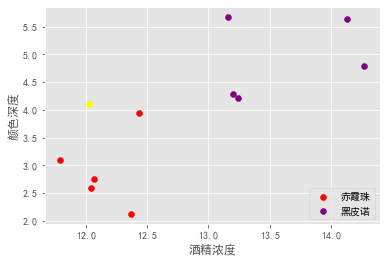

In [5]:
X = np.array(wine_data.iloc[:,0:2]) #我们把特征（酒的属性）放在X
y = np.array(wine_data.iloc[:,-1]) #把标签（酒的类别）放在Y
#探索数据，假如我们给出新数据[12.03,4.1] ，你能猜出这杯红酒是什么类别么?
new_data = np.array([12.03,4.1])
plt.scatter(X[y==1,0], X[y==1,1], color='red', label='赤霞珠') #画出标签y为1的、关于“赤霞珠”的散点
plt.scatter(X[y==0,0], X[y==0,1], color='purple', label='黑皮诺') #画出标签y为0的、关于“黑皮诺”的散点
plt.scatter(new_data[0],new_data[1], color='yellow') # 新数据点
new_data
plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')
plt.legend(loc='lower right')
plt.savefig('葡萄酒样本.png')

# 计算标记点与所有样本的距离

In [6]:
#我们使用欧式距离公式，计算新数据点 new_data 与现存的 X 数据集每一个点的距离:
from math import sqrt
distance = [sqrt(np.sum((x-new_data)**2)) for x in X ]
distance


[2.6041505332833594,
 1.1837651794169315,
 1.9424983912477256,
 2.3468276459936295,
 1.2159358535712326,
 1.3405968819895113,
 0.4308131845707605,
 1.0283968105745949,
 2.0089798406156287,
 1.500033332962971]

In [7]:
#将距离升序排列，然后选取距离最小的k个点
sort_dist = np.argsort(distance)
sort_dist

array([6, 7, 1, 4, 5, 9, 2, 8, 3, 0], dtype=int64)

In [8]:
#输出最近三点的标签
k = 3
topK = [y[i] for i in sort_dist[:k]]
topK

[1, 1, 0]

In [26]:
#确定前k个点所在类别的计数
pd.Series(topK).value_counts().index[0]

1

# 总结

In [55]:
# # 1.把10个训练数据提取到data中
# data = wine_data.iloc[:,:2].values #将前两列提取出来----data

# # 2. 新数据点与10个一维数组的欧式距离
# # 数据点第一个特征与10个点的欧式距离
# a = ((np.array([[12.3,4.1]])-data) ** 2)[:,0] #第一列抽取出来
# # 数据点第二个特征与10个点的欧式距离
# b = ((np.array([[12.3,4.1]])-data) ** 2)[:,1] #第二列抽取出来
# # 得到数据点与10个点的欧氏距离
# Distance = np.sqrt(a+b)
# np.sort(Distance)
# # 3.排序找出最近的K个点   K=3
# K3 = np.argsort(Distance)[:3] #得到开始表的索引值     6 1 4
# # 4.判断类别
# y = wine_data.品种
# # 根据频数统计判断属于哪一类
# pd.Series([y[i] for i in K3]).value_counts().idxmax()

将上述过程封装成一个函数


In [34]:
def KNN(new_data,dataSet,k):  #x是输入的点  返回类别
    '''
函数功能：KNN分类器
参数说明：
new_data: 需要预测分类的数据集
dataSet: 已知分类标签的数据集
k: k-近邻算法参数，选择距离最小的k个点
return:
result: 分类结果
'''
    from math import sqrt
    from collections import Counter
    import numpy as np
    import pandas as pd
    result = []
    distance = [sqrt(np.sum((x-new_data)**2)) for x in np.array(dataSet.iloc[:,0:2])]
    sort_dist = np.argsort(distance)
    topK = [dataSet.iloc[:,-1][i] for i in sort_dist[:k]]
    result.append(pd.Series(topK).value_counts().index[0])
    return result



In [35]:
new_data=np.array([12.03,4.1])
k = 3
KNN(new_data,wine_data,k)

[1]

# 使用sklearn调用KNN

SCIKIT-LEARN算法库实现
scikit-learn 自 2007 年发布以来，scikit-learn已经成为 Python 中重要的机器学习库了。scikit-learn，
简称 sklearn， 支持了包括分类、回归、降维和聚类四大机器学习算法，以及特征提取、数据预处理和
模型评估三大模块。 在工程应用中，用 Python 手写代码来从头实现一个算法的可能性非常低，这样不
仅耗时耗力，还不一 定能够写出构架清晰，稳定性强的模型。更多情况下，是分析采集到的数据，根据
数据特征选择适合的算法， 在工具包中调用算法，调整算法的参数，获取需要的信息，从而实现算法效
率和效果之间的平衡。而 sklearn， 正是这样一个可以帮助我们高效实现算法应用的工具包。
主要设计原则：

1) 一致性
所有对象共享一个简单一致的界面(接口)。
估算器：fit()方法。基于数据估算参数的任意对象，使用的参数是一个数据集(对应 X, 有监督算法
还需要一个 y)，引导估算过程的任意其他参数称为超参数，必须被设置为实例变量。
转换器：transform()方法。使用估算器转换数据集，转换过程依赖于学习参数。可以使用便捷方
式: fit_transform()，相当于先 fit()再 transform()。(fit_transform 有时被优化过，速度更快)
预测器：predict()方法。使用估算器预测新数据，返回包含预测结果的数据，还有score()方法:用
于度量给定测试集的预测效果的好坏。(连续 y 使用 R 方,分类 y 使用准确率 accuracy)

2) 监控
检查所有参数，所有估算器的超参数可以通过公共实例变量访问，所有估算器的学习参数都可以通过有
下划线后缀的公共实例变量访问。

3) 防止类扩散
对象类型固定，数据集被表示为 Numpy 数组或 Scipy 稀疏矩阵，超参是普通的 Python 字符或数字。

4) 合成
现有的构件尽可能重用，可以轻松创建一个流水线 Pipeline。

5) 合理默认值
大多数参数提供合理默认值，可以轻松搭建一个基本的工作系统

In [39]:
from sklearn.neighbors import KNeighborsClassifier
# 0 代表 “黑皮诺”，1 代表 “赤霞珠”
clf = KNeighborsClassifier(n_neighbors = 3)
clf = clf.fit(wine_data.iloc[:,0:2], wine_data.iloc[:,-1])
result = clf.predict([[12.8,4.1]]) # 返回预测的标签
result

array([0], dtype=int64)

In [40]:
# 对模型进行一个评估，接口score返回预测的准确率
score = clf.score([[12.8,4.1]],[0])
score


1.0

In [ ]:
clf.predict_proba([[12.8,4.1]])
 #拿到模型预测的结果